In [265]:
#les imports 
import numpy as np
import pandas as pd
#from pyspark.mllib.stat import Statistics 
from math import sqrt 
from pprint import pprint
from numpy import array
import os
import os.path as osp
import pickle

In [266]:
df = pd.read_excel("videos.xlsx")


In [269]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
df_or = df
df_or= df_or.values
X = df_or[:,0:377]
y = df_or[:,377]
X_train,X_test,y_train,y_test = train_test_split(X, y,, test_size=0.33, random_state=42)

from time import time
t0 = time()

from sklearn.ensemble import ExtraTreesClassifier
print("X_train.shape={}, X_test.shape={}".format(X_train.shape, X_test.shape))
#clf = clf = ExtraTreesClassifier(n_estimators=500, max_depth=None, n_jobs=-1)
#clf.fit(X_train, y_train)

forest = ExtraTreesClassifier(n_estimators=500, max_depth=None, n_jobs=-1)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of ExtraTreesClassifier = {:.6f} %".format(acc * 100)) 

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train.shape=(34032, 377), X_test.shape=(11344, 377)
Test Accuracy of ExtraTreesClassifier = 96.932299 %
('Compte fait en ', '8.865', ' seconds')


Automatically created module for IPython interactive environment
Feature ranking:


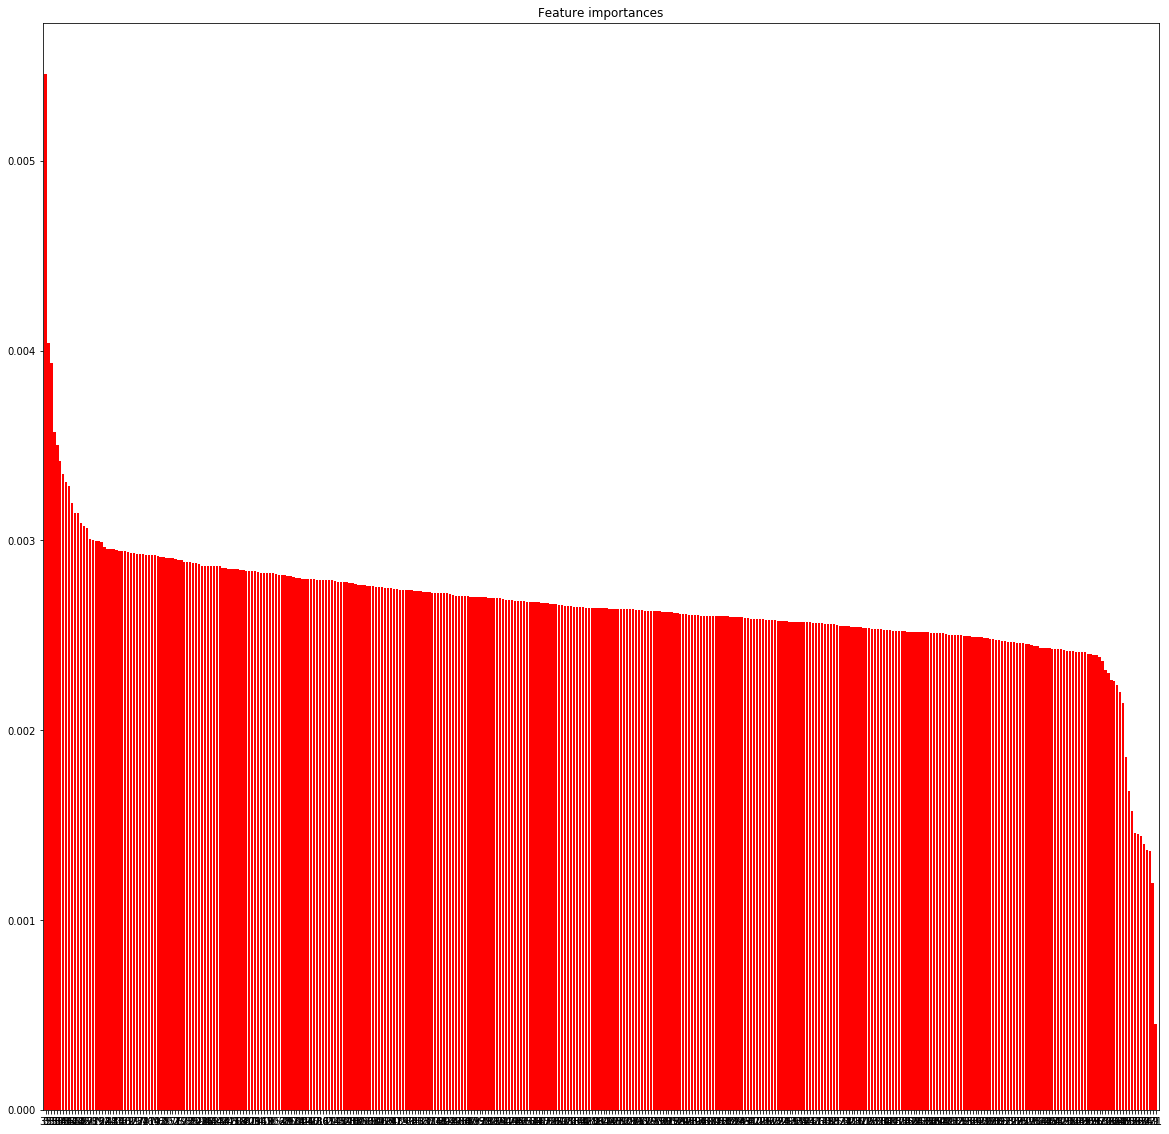

In [270]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

 

# Build a forest and compute the feature importances
#forest = ExtraTreesClassifier()

#forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#for f in range(X_train.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()
 


In [271]:
# Plot normalized confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names=['0','50','33','66','40','20','60','75','25','100']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

   # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
Normalized confusion matrix


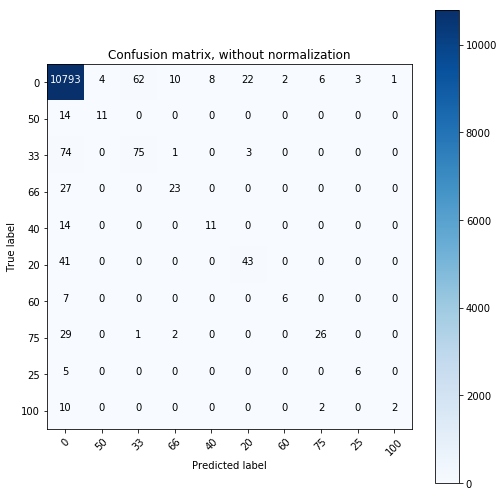

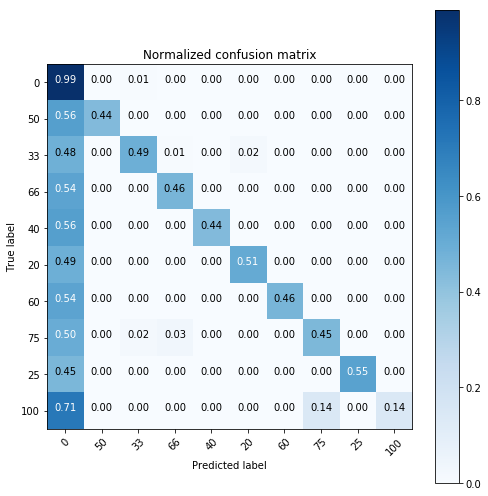

In [272]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# sur echantillonnage

In [273]:
#comptage des valeurs
print('comptage des valeurs  ValueToPredict : ')
print('-------------------------------------- ')

print(df['ValueToPredict'].value_counts())

comptage des valeurs  ValueToPredict : 
-------------------------------------- 
0      43659
25       603
50       327
33       204
66       199
40       103
20        97
60        77
75        55
100       52
Name: ValueToPredict, dtype: int64


In [274]:
# Filtre les classes minoritaire
c20=df[df.ValueToPredict == 20 ]   # 97
c25=df[df.ValueToPredict == 25 ]   # 603
c50=df[df.ValueToPredict == 50 ]   # 327
c33=df[df.ValueToPredict == 33 ]   # 204
c66=df[df.ValueToPredict == 66 ]   # 199
c40=df[df.ValueToPredict == 40 ]   # 103
c60=df[df.ValueToPredict == 60 ]   # 77
c75=df[df.ValueToPredict == 75]    # 55
c100=df[df.ValueToPredict == 100]  # 52

In [275]:
 # Préparation des classes Minoritaire
c20 = pd.concat([c20,c20], ignore_index=True)     # Classe 20 duppliquer en 6 fois 97 * 6 = 582
c60 = pd.concat([c60,c60], ignore_index=True) # Classe 60 duppliquer en 7 fois 77 * 7 = 539
c75 = pd.concat([c75,c75,c75,c75], ignore_index=True) # Classe 75 duppliquer en 10 fois 55 * 10 =550
c100 = pd.concat([c100,c100,c100,c100,c100,c100], ignore_index=True) # Classe 100 duppliquer en 10 fois 52 * 10 = 520
c50 = pd.concat([c50,c50,c50,c50,c50,c50], ignore_index=True)  # Classe 50 duppliqu,er en 2 fois 327 * 2 = 654
c33 = pd.concat([c33,c33,c33,c33,c33], ignore_index=True)   # Classe 33 duppliquer en 3 fois 204 * 3 = 612
#c66 = pd.concat([c66], ignore_index=True)   # Classe 66 duppliquer en 3 fois 199 * 3 = 597
c40 = pd.concat([c40,c40,c40,c40], ignore_index=True)   # Classe 40 duppliquer en 6 fois 103 * 6 = 618
c25 = pd.concat([c25,c25], ignore_index=True)   # Classe 40 duppliquer en 6 fois 103 * 6 = 618

In [276]:
print c20.shape
print c60.shape
print c75.shape
print c100.shape
print c50.shape
print c33.shape
print c66.shape
print c40.shape

(194, 378)
(154, 378)
(220, 378)
(312, 378)
(1962, 378)
(1020, 378)
(199, 378)
(412, 378)


In [277]:
c_ech = pd.concat([c20,c60,c75,c100,c50,c33,c40,c66,c25], ignore_index=True)  #  (4672, 378)

In [278]:
c_ech.shape

(5679, 378)

In [279]:
df_ech = pd.concat([df, c_ech], ignore_index=True) # (45376 + 4672) = (50048, 378)

In [280]:
df_ech.shape  # Dataset apres sur-échantionnage 

(51055, 378)

In [281]:
df.shape

(45376, 378)

In [282]:
print(df_ech['ValueToPredict'].value_counts())  # statistique de la nouvelle dataset 

0      43659
50      2289
25      1809
33      1224
40       515
66       398
100      364
20       291
75       275
60       231
Name: ValueToPredict, dtype: int64


In [283]:
df_ech = df_ech.values  # converter en array

In [292]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X = df_ech[:,0:377]
y = df_ech[:,377]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#X_train,X_test,y_train,y_test = train_test_split(Xf, yf, test_size=0.33, random_state=42)


In [293]:
# Plot normalized confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names=['0','50','33','66','40','20','60','75','25','100']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

   # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [294]:
from time import time
t0 = time()

from sklearn.ensemble import ExtraTreesClassifier
print("X_train.shape={}, X_test.shape={}".format(X_train.shape, X_test.shape))
clf = clf = ExtraTreesClassifier(n_estimators=500, max_depth=None, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of ExtraTreesClassifier = {:.6f} %".format(acc * 100)) 

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train.shape=(34206, 377), X_test.shape=(16849, 377)
Test Accuracy of ExtraTreesClassifier = 97.851505 %
('Compte fait en ', '8.852', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


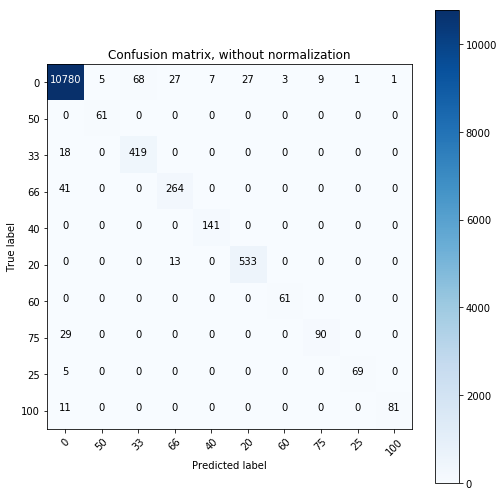

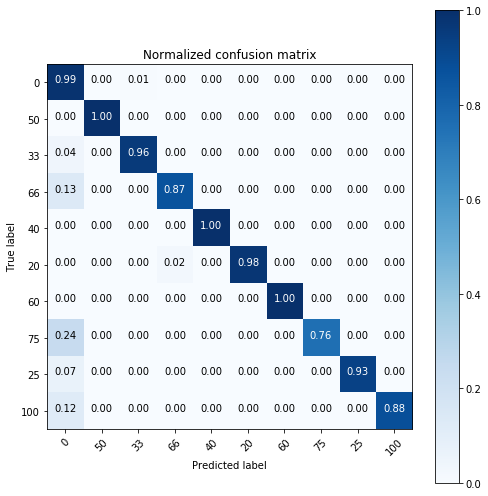

In [291]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()